# Importar Librerias y Datos

In [2]:
import geopandas as gpd
import pandas as pd
import json

In [3]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
regional_accesos = rango_velocidad_regional_unpivot.groupby(["Provincia", "Año", "Trimestre"])['Accesos'].sum().reset_index()   
regional_accesos 

,Provincia,Año,Trimestre,Accesos
0,Buenos Aires,2014,1,2624541
1,Buenos Aires,2014,2,2659316
2,Buenos Aires,2014,3,2647181
3,Buenos Aires,2014,4,2705953
4,Buenos Aires,2015,1,2754612
...,...,...,...,...
835,Tucumán,2021,3,232472
836,Tucumán,2021,4,238639
837,Tucumán,2022,1,245584
838,Tucumán,2022,2,254527


El dataframe provincias tiene información como latitud, longitud e iso_id que pueden ser útiles a la hora de visualizar el mapa. El origen de este archivo es de [API Georef](https://datos.gob.ar/dataset/jgm-servicio-normalizacion-datos-geograficos/archivo/jgm_8.1).

In [4]:
with open("../raw_data/provincias.json", "r") as file:
    data = json.load(file) # guarda los datos del json

data.keys()

dict_keys(['provincias', 'total', 'cantidad', 'parametros', 'inicio'])

In [5]:
provincias = pd.DataFrame(data["provincias"])
provincias.head()

,nombre_completo,fuente,iso_id,nombre,id,categoria,iso_nombre,centroide
0,Provincia de Misiones,IGN,AR-N,Misiones,54,Provincia,Misiones,"{'lat': -26.8753965086829, 'lon': -54.65169662..."
1,Provincia de San Luis,IGN,AR-D,San Luis,74,Provincia,San Luis,"{'lat': -33.7577257449137, 'lon': -66.02812981..."
2,Provincia de San Juan,IGN,AR-J,San Juan,70,Provincia,San Juan,"{'lat': -30.8653679979618, 'lon': -68.88949084..."
3,Provincia de Entre RÃ­os,IGN,AR-E,Entre RÃ­os,30,Provincia,Entre RÃ­os,"{'lat': -32.0588735436448, 'lon': -59.20144755..."
4,Provincia de Santa Cruz,IGN,AR-Z,Santa Cruz,78,Provincia,Santa Cruz,"{'lat': -48.8154851827063, 'lon': -69.95576216..."


Mientras que provincias_geojson tiene las formas de las provincias, datos sacados del [IGN](https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG).

In [6]:
provincias_geojson = gpd.read_file("../raw_data/provincia/provincia.shp")

# Limpieza

## Provincias

In [7]:
provincias["centroide"][0]["lat"]

-26.8753965086829

In [8]:
# separando latitud y longitud del centroide

provincias['latitud'] = [x['lat'] for x in provincias['centroide']]
provincias['longitud'] = [x['lon'] for x in provincias['centroide']]

In [9]:
# arreglando tildes

provincias = provincias.replace("RÃ­o", "Río", regex=True)
provincias = provincias.replace("AutÃ³noma", "Autónoma", regex=True)
provincias = provincias.replace("NeuquÃ©n", "Neuquén", regex=True)
provincias = provincias.replace("TucumÃ¡n", "Tucumán", regex=True)
provincias = provincias.replace("CÃ³rdoba", "Córdoba", regex=True)
provincias = provincias.replace("AntÃ¡rtida", "Antártida", regex=True)
provincias = provincias.replace("AtlÃ¡ntico", "Atlántico", regex=True)

In [10]:
provincias.drop(columns="centroide", inplace=True)

In [11]:
# para que el nombre quede igual a los demas dataframes

provincias = provincias.replace("Ciudad Autónoma de Buenos Aires", "Capital Federal", regex=True)
provincias = provincias.replace("Santiago del Estero", "Santiago Del Estero", regex=True)
provincias = provincias.replace("Tierra del Fuego", "Tierra Del Fuego", regex=True)

In [12]:
provincias

,nombre_completo,fuente,iso_id,nombre,id,categoria,iso_nombre,latitud,longitud
0,Provincia de Misiones,IGN,AR-N,Misiones,54,Provincia,Misiones,-26.875397,-54.651697
1,Provincia de San Luis,IGN,AR-D,San Luis,74,Provincia,San Luis,-33.757726,-66.028130
2,Provincia de San Juan,IGN,AR-J,San Juan,70,Provincia,San Juan,-30.865368,-68.889491
3,Provincia de Entre Ríos,IGN,AR-E,Entre Ríos,30,Provincia,Entre Ríos,-32.058874,-59.201448
4,Provincia de Santa Cruz,IGN,AR-Z,Santa Cruz,78,Provincia,Santa Cruz,-48.815485,-69.955762
5,Provincia de Río Negro,IGN,AR-R,Río Negro,62,Provincia,Río Negro,-40.405796,-67.229330
6,Provincia del Chubut,IGN,AR-U,Chubut,26,Provincia,Chubut,-43.788623,-68.526759
7,Provincia de Córdoba,IGN,AR-X,Córdoba,14,Provincia,Córdoba,-32.142933,-63.801753
8,Provincia de Mendoza,IGN,AR-M,Mendoza,50,Provincia,Mendoza,-34.629887,-68.583123
9,Provincia de La Rioja,IGN,AR-F,La Rioja,46,Provincia,La Rioja,-29.685776,-67.181736


## Provincias GeoJson

In [13]:
provincias_geojson = provincias_geojson.replace("Ciudad Autónoma de Buenos Aires", "Capital Federal", regex=True)
provincias_geojson = provincias_geojson.replace("Santiago del Estero", "Santiago Del Estero", regex=True)
provincias_geojson = provincias_geojson.replace("Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Tierra Del Fuego", regex=True)

In [14]:
provincias_geojson.head()

,gid,entidad,fna,gna,nam,in1,fdc,sag,fdc2,geometry
0,1,0.0,Capital Federal,Capital Federal,Capital Federal,02,IGN,IGN,NaN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0.0,Provincia del Neuquén,Provincia,Neuquén,58,IGN,IGN,NaN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,3,0.0,Provincia de San Luis,Provincia,San Luis,74,IGN,IGN,NaN,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,4,0.0,Provincia de Santa Fe,Provincia,Santa Fe,82,IGN,IGN,NaN,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,11,0.0,Provincia del Chubut,Provincia,Chubut,26,IGN,IGN,NaN,"MULTIPOLYGON (((-66.69852 -45.24747, -66.69920..."


# Mapas

Primero se hace un merge para tener todo consolidado en una sola tabla.

In [15]:
columnas_provincias = ["iso_nombre", "iso_id", "latitud", "longitud", "nombre_completo", "categoria"]
provincias_completo = provincias_geojson.merge(provincias[columnas_provincias], left_on='nam', right_on='iso_nombre')

In [16]:
escoger_columnas =["geometry", "iso_nombre", "iso_id", "latitud", "longitud", "nombre_completo", "categoria"]
provincias_completo = provincias_completo[escoger_columnas]

In [17]:
provincias_completo.head()

,geometry,iso_nombre,iso_id,latitud,longitud,nombre_completo,categoria
0,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5...",Capital Federal,AR-C,-34.614493,-58.445856,Capital Federal,Ciudad Autónoma
1,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1...",Neuquén,AR-Q,-38.641758,-70.118571,Provincia del Neuquén,Provincia
2,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8...",San Luis,AR-D,-33.757726,-66.028130,Provincia de San Luis,Provincia
3,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9...",Santa Fe,AR-S,-30.706927,-60.949837,Provincia de Santa Fe,Provincia
4,"MULTIPOLYGON (((-66.69852 -45.24747, -66.69920...",Chubut,AR-U,-43.788623,-68.526759,Provincia del Chubut,Provincia


Ahora se define lo que queremos visualizar, en este caso se va a comparar los accesos de 2014 con los de 2022 en sus ultimos trimestres.

In [39]:
accesos_2022 = regional_accesos[(regional_accesos["Año"] == 2022) & (regional_accesos["Trimestre"] == 3)]
accesos_2022.head()

,Provincia,Año,Trimestre,Accesos
34,Buenos Aires,2022,3,4721668
69,Capital Federal,2022,3,1547679
104,Catamarca,2022,3,70293
139,Chaco,2022,3,144146
174,Chubut,2022,3,165778


In [40]:
accesos_2014 = regional_accesos[(regional_accesos["Año"] == 2014) & (regional_accesos["Trimestre"] == 4)]
accesos_2014.head()

,Provincia,Año,Trimestre,Accesos
3,Buenos Aires,2014,4,2705953
38,Capital Federal,2014,4,1331973
73,Catamarca,2014,4,25493
108,Chaco,2014,4,66060
143,Chubut,2014,4,68538


C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_14832\1147093543.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):
C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_14832\1147093543.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):


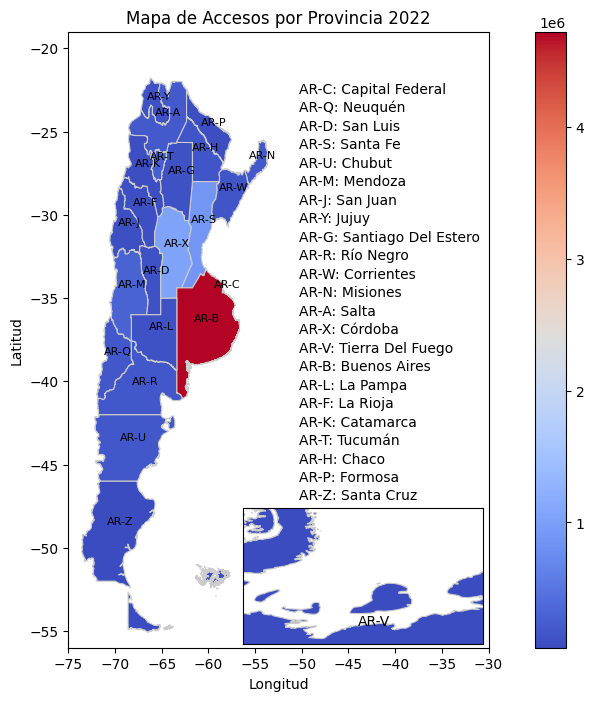

In [70]:
# union de accesos por la columna Provincia y provincias_completo por la columna iso_nombre
merged = provincias_completo.merge(accesos_2022, left_on='iso_nombre', right_on='Provincia')

fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='Accesos', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Mapa de Accesos por Provincia' + " " + "2022")
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# el centroide es el punto promedio de los poligonos de las provincias
# itera sobre las coordenadas x e y del centroide de cada provincia. 
# label es iso_id
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', color='black')

glosario = merged[['iso_nombre', 'iso_id']].drop_duplicates().reset_index(drop=True)

# los numeros de text() indican la posicion del glosario y la distancia entre linea y linea
for i, row in glosario.iterrows():
    ax.text(0.55, 0.90 - i * 0.03, f"{row['iso_id']}: {row['iso_nombre']}", transform=ax.transAxes, fontsize=10)

# limites del mapa grande
plt.xlim(-75, -30)
plt.ylim(-56, -19)

# limites del zoom
zoom_x = [-74, -30]
zoom_y = [-84, -70]

# dimensiones del recuadro del zoom
ax_zoom = fig.add_axes([0.54, 0.1, 0.2, 0.2])
ax_zoom.set_xlim(*zoom_x)
ax_zoom.set_ylim(*zoom_y)

# vacio para que no muestre los numeros de los ejes
ax_zoom.set_xticks([])
ax_zoom.set_yticks([])

merged.plot(column='Accesos', cmap='coolwarm', linewidth=0.8, ax=ax_zoom, edgecolor='0.8', legend=False)

# vuelve a iterar, si las coordenadas estan dentro los limites del zoom, pone la etiqueta
# en este caso solo Tierra del Fuego esta ahi
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):
    if zoom_x[0] <= x <= zoom_x[1] and zoom_y[0] <= y <= zoom_y[1]:
        ax_zoom.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=10, ha='center', color='black')

plt.show()


C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_14832\86853520.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):
C:\Users\ASUS X515\AppData\Local\Temp\ipykernel_14832\86853520.py:44: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):


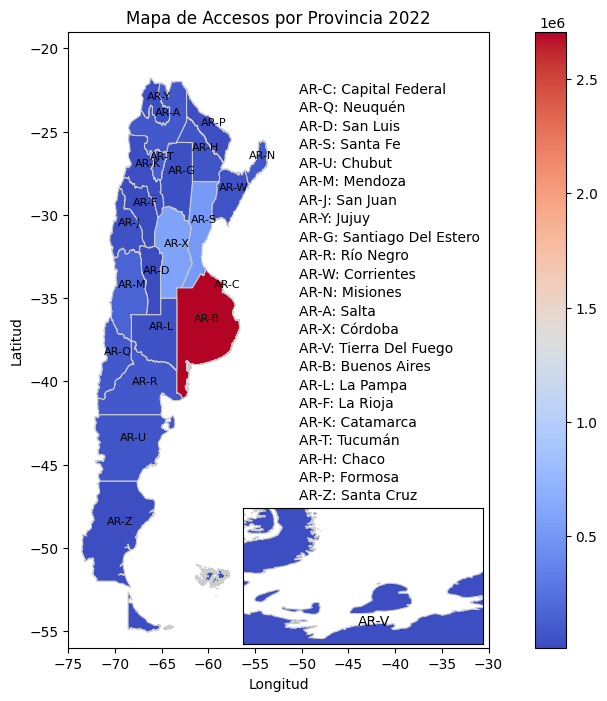

In [71]:
# union de accesos por la columna Provincia y provincias_completo por la columna iso_nombre
merged = provincias_completo.merge(accesos_2014, left_on='iso_nombre', right_on='Provincia')

fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='Accesos', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Mapa de Accesos por Provincia' + " " + "2022")
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# el centroide es el punto promedio de los poligonos de las provincias
# itera sobre las coordenadas x e y del centroide de cada provincia. 
# label es iso_id
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', color='black')

glosario = merged[['iso_nombre', 'iso_id']].drop_duplicates().reset_index(drop=True)

# los numeros de text() indican la posicion del glosario y la distancia entre linea y linea
for i, row in glosario.iterrows():
    ax.text(0.55, 0.90 - i * 0.03, f"{row['iso_id']}: {row['iso_nombre']}", transform=ax.transAxes, fontsize=10)

# limites del mapa grande
plt.xlim(-75, -30)
plt.ylim(-56, -19)

# limites del zoom
zoom_x = [-74, -30]
zoom_y = [-84, -70]

# dimensiones del recuadro del zoom
ax_zoom = fig.add_axes([0.54, 0.1, 0.2, 0.2])
ax_zoom.set_xlim(*zoom_x)
ax_zoom.set_ylim(*zoom_y)

# vacio para que no muestre los numeros de los ejes
ax_zoom.set_xticks([])
ax_zoom.set_yticks([])

merged.plot(column='Accesos', cmap='coolwarm', linewidth=0.8, ax=ax_zoom, edgecolor='0.8', legend=False)

# vuelve a iterar, si las coordenadas estan dentro los limites del zoom, pone la etiqueta
# en este caso solo Tierra del Fuego esta ahi
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['iso_id']):
    if zoom_x[0] <= x <= zoom_x[1] and zoom_y[0] <= y <= zoom_y[1]:
        ax_zoom.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=10, ha='center', color='black')

plt.show()

En cuanto a proporción, hay poca diferencia entre el estado de 2014 y de 2022. La provincia de Buenas Aires y la Capital Federal siguen representando la mayoria de los accesos a internet fijo.